# Example notebook for agglomeration and breakage

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\wuyua\Projects\PycharmProjects\crm


In [2]:
from crm.presets.hypothetical import Hypothetical1D, HypotheticalAgg1D, HypotheticalBrk1D, HypotheticalAggBrk1D
from crm.solvers.mcsolver import MCSolver, MCSolverOptions
from crm.base.input import ConstantTemperatureInput
from crm.base.output_spec import OutputAllSpec
from crm.utils.pandas import StateDataFrame
from crm.utils.csd import edges_to_center_grid
from crm.utils.compress import BinningCompressor

In [16]:
sys_no_agg_brk = Hypothetical1D()
sys_agg_only = HypotheticalAgg1D()
sys_brk_only = HypotheticalBrk1D()
sys_agg_brk = HypotheticalAggBrk1D()

In [17]:
system_spec = sys_agg_only
initial_state = system_spec.make_state(concentration=system_spec.forms[0].solubility(t=60), temperature=25)
input_ = ConstantTemperatureInput(25.0)

options = MCSolverOptions(output_spec=OutputAllSpec(), compressor=BinningCompressor(minimum_row=1))
solver = MCSolver(system_spec, options)

In [18]:
result = solver.compute(initial_state, 800, input_)

In [19]:
sdf = StateDataFrame(result)

In [20]:
system_spec = sys_no_agg_brk
initial_state = system_spec.make_state(concentration=system_spec.forms[0].solubility(t=60), temperature=25)
input_ = ConstantTemperatureInput(25.0)

options = MCSolverOptions(output_spec=OutputAllSpec())
solver = MCSolver(system_spec, options)

In [21]:
result_ref = solver.compute(initial_state, 800, input_)

In [22]:
sdf_ref = StateDataFrame(result_ref)

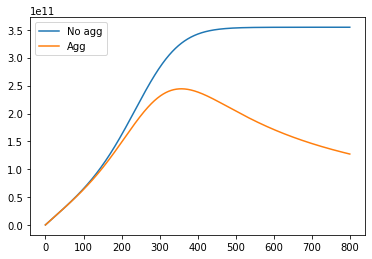

In [23]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
sdf_ref.counts.plot(ax=ax)
sdf.counts.plot(ax=ax)
ax.legend(["No agg", "Agg"])

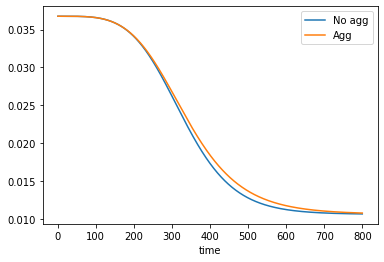

In [24]:
fig, ax = plt.subplots()
sdf_ref.concentration.plot(ax=ax)
sdf.concentration.plot(ax=ax)
ax.legend(["No agg", "Agg"])

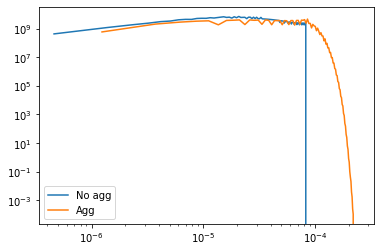

In [25]:
fig, ax = plt.subplots()
csd_ref, edges = sdf_ref.get_csd()
grid = edges_to_center_grid(edges)

idx = -1
ax.plot(grid, csd_ref.iloc[idx][0])

csd, edges = sdf.get_csd()
grid = edges_to_center_grid(edges)

ax.plot(grid, csd.iloc[idx][0])

ax.legend(["No agg", "Agg"])
ax.set_yscale("log")
ax.set_xscale("log")


<AxesSubplot:xlabel='time'>

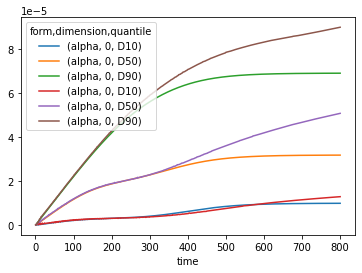

In [26]:
fig, ax = plt.subplots()
sdf_ref.quantiles.plot(ax=ax)
sdf.quantiles.plot(ax=ax)

<AxesSubplot:>

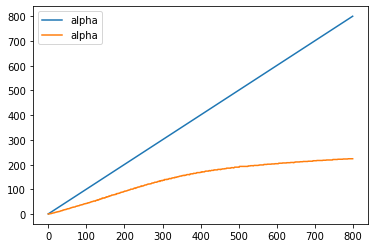

In [27]:
fig, ax = plt.subplots()
sdf_ref.n_rows.plot(ax=ax)
sdf.n_rows.plot(ax=ax)

,alpha
,0
time,
1.0,"[609685185.4479268, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
2.0,"[1219372009.06488, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
3.0,"[1829064280.9820855, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4.0,"[1829082133.5601945, 609685185.447927, 0.0, 0...."
5.0,"[1829115763.9066527, 1219372009.0648801, 0.0, ..."
...,...
296.0,"[4205919857.5356092, 5415283236.248235, 557964..."
297.0,"[4176866302.0476036, 5380952266.335472, 554777..."
